In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
import seaborn as sns
from scipy.special import expit as logit

df_cleaned = pd.read_csv('all_predictions.csv',  sep= ';', decimal=',')
print(df_cleaned.columns.values)

#print(df_cleaned)

['pat' 'groundtruth' 'Cat1' 'Cat2' 'Cat3' 'Cat4']


In [2]:
param = ['Cat1', 'Cat2', 'Cat3', 'Cat4']

df_cleaned['bias'] = 1

df_cleaned['c4'] = [ x==4 for x in df_cleaned['groundtruth']]
df_cleaned['c3'] = [ x==3 for x in df_cleaned['groundtruth']]
df_cleaned['c2'] = [ x==2 for x in df_cleaned['groundtruth']]
df_cleaned['c1'] = [ x==1 for x in df_cleaned['groundtruth']]

tmp = ['bias']
tmp.extend(param)

class_to_predict = 'c4'
df = df_cleaned[df_cleaned.index % 3 != 0]
X = np.matrix(df[tmp])
y = np.matrix(df[[class_to_predict]])

#print(X)
#print(y)

<IPython.core.display.Javascript object>


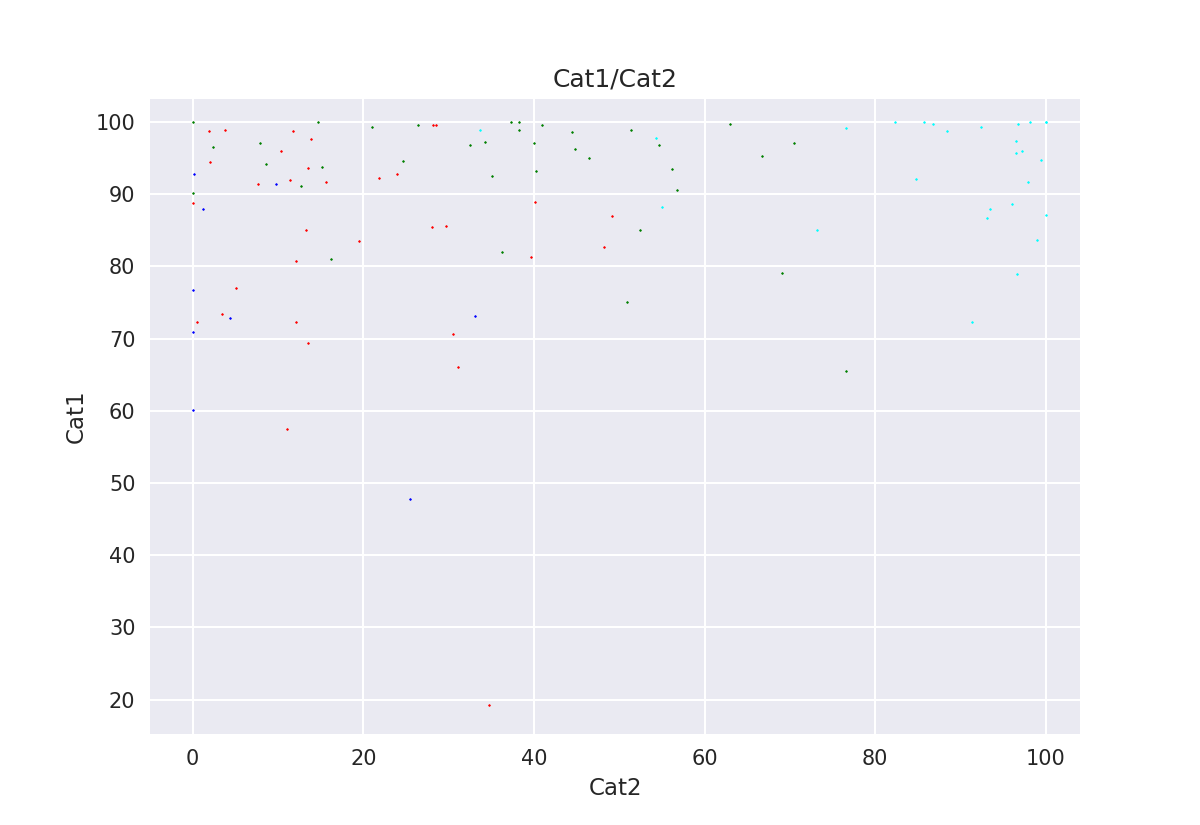

In [3]:
def scatter():
    cat4 = df_cleaned.where(df_cleaned['c4'])
    cat3 = df_cleaned.where(df_cleaned['c3'])
    cat2 = df_cleaned.where(df_cleaned['c2'])
    cat1 = df_cleaned.where(df_cleaned['c1'])
    
    
    param1 = param[0]
    param2 = param[1]
    #param1 = 'humerus_r_y'
    #param2 = 'scapula_r_y'
    
    plt.plot(cat3[param1], cat3[param2], '.', color='red', markersize=2)
    plt.plot(cat1[param1], cat1[param2], '.', color='cyan', markersize=2)
    plt.plot(cat2[param1], cat2[param2], '.', color='green', markersize=2)
    plt.plot(cat4[param1], cat4[param2], '.', color='blue', markersize=2)
    plt.title(param1+'/'+param2)
    plt.ylabel(param1)
    plt.xlabel(param2);

#    plt.plot(cat3[param[0]], cat3[param[1]], '.', color='red', markersize=2)
#    plt.plot(cat1[param[0]], cat1[param[1]], '.', color='cyan', markersize=2)
#    plt.plot(cat2[param[0]], cat2[param[1]], '.', color='green', markersize=2)
#    plt.plot(cat4[param[0]], cat4[param[1]], '.', color='blue', markersize=2)
#    plt.title(param[0]+'/'+param[1])
#    plt.ylabel(param[1])
#    plt.xlabel(param[0]);
    #plt.xlim(-4000,4000)
    #plt.ylim(-3500,3500)
scatter()



In [4]:
def logit(z):
    return 1.0 / (1.0 + np.exp(-z))

def h(X, theta):
    return logit(X * theta)

def predict(X, theta):
    return h(X, theta) >= 0.5

def fit_model(X, y, alpha=0.00001, iterations=50000):
    m = X.shape[1]            # het aantal coefficienten
    print(m)
    theta = np.zeros((m, 1))  # initialiseer theta
    for iter in range(iterations):
        theta -= (alpha / m) * X.T * ( h(X, theta) - y )
    return theta

def evaluate(theta, X, y):
    return sum( predict(X, theta) == y ) / len(X)

def plot_decision_boundary(theta):
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    print(x_min,x_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    X = np.matrix(np.vstack([np.ones(xx.shape[0] * xx.shape[1]), xx.ravel(), yy.ravel()])).T
    boundary = logit(X * theta)
    boundary = boundary.reshape(xx.shape)

    ax.contour(xx, yy,
           boundary,
           levels=[0.5])
    

In [5]:
%%time
theta = fit_model(X, y)
print(theta)


5
[[  4.56148584e-04]
 [ -4.05462952e-03]
 [ -8.69202660e-02]
 [ -3.39278686e-02]
 [  5.63124539e-01]]
CPU times: user 1.81 s, sys: 0 ns, total: 1.81 s
Wall time: 1.81 s


In [6]:
evaluate(theta, X, y)

matrix([[ 1.]])

In [7]:
scatter()
plot_decision_boundary(theta[0:3])

-5.0 105.0


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


In [8]:
x = predict(X, theta)

#df['predict'] = x
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')

TP = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


             pos  neg
0  pred pos    6    0
1  pred neg    0   64

recall 1.0
precision 1.0
accuracy 1.0


In [9]:
## test set
df = df_cleaned[df_cleaned.index % 3 == 1] 
X2 = np.matrix(df[tmp])
y2 = np.matrix(df[[class_to_predict]])

x = predict(X2, theta)

#writer = pd.ExcelWriter('output.xlsx')

#df['predict'] = x
#df.to_excel(writer,'Sheet2')
#writer.save()

TP = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y2[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y2[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print("resultaten op testset")
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


resultaten op testset
             pos  neg
0  pred pos    3    0
1  pred neg    0   32

recall 1.0
precision 1.0
accuracy 1.0


In [10]:
# kolom met voorspelling toevoegen aan data
Xtmp = np.matrix(df_cleaned[tmp])
name = 'predict_'+class_to_predict
df_cleaned[name] = h(Xtmp, theta)

df_cleaned.to_csv(name+'.csv', sep=";", decimal=',')